# Introduction to PyPSA

**Python for Power System Analysis (PyPSA)**

PyPSA is a python package that supports energy and electricity system modeling. The PyPSA package provides a framework for simulating and optimizing energy and electricity systems. PyPSA provides users structured components for which they can store the data which populates an optimization model.

## Learning Objectives

By the end of this session, you will:
1. Understand what PyPSA is and its core capabilities
2. Learn the basic components of a power system model in PyPSA
3. Build your first simple power system network
4. Run an economic dispatch model
5. Run a basic capacity expansion model
5. Visualize network topology and results

In [11]:
# Import necessary libraries
import pypsa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pypsa.__version__

'0.35.2'

## 1. Anatomy of a PyPSA Network

Lets load an example network. This is a pypsa-usa network created for ERCOT with:
- demand data for the year 2030 from the NREL EFS
- 7 buses nodes
- 380 resource regions
- 72 transmission links

In [12]:
path = os.path.join("../data/examples", "elec_s380_c7a_ec_lv1.5_RPS-REM-TCT-1h_E.nc")
network = pypsa.Network(path)
network

INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


PyPSA Network ''
----------------
Components:
 - Bus: 7
 - Carrier: 17
 - Generator: 1355
 - GlobalConstraint: 1
 - Link: 22
 - Load: 7
 - StorageUnit: 14
Snapshots: 8760

In [13]:
network.buses

,v_nom,type,x,y,carrier,unit,location,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,...,country,reeds_zone,reeds_ba,interconnect,nerc_reg,trans_reg,trans_grp,reeds_state,rec_trading_zone,substation_lv
Bus,,,,,,,,,,,,,,,,,,,,,
p60,230.0,,-100.465149,33.045614,AC,,,1.0,0.0,inf,...,p60,p60,ERCO,texas,ERCOT,ERCOT,ERCOT,TX,ERCOT,True
p61,230.0,,-101.298453,30.883641,AC,,,1.0,0.0,inf,...,p61,p61,ERCO,texas,ERCOT,ERCOT,ERCOT,TX,ERCOT,True
p62,230.0,,-102.583086,31.840422,AC,,,1.0,0.0,inf,...,p62,p62,ERCO,texas,ERCOT,ERCOT,ERCOT,TX,ERCOT,True
p63,230.0,,-96.863645,32.436442,AC,,,1.0,0.0,inf,...,p63,p63,ERCO,texas,ERCOT,ERCOT,ERCOT,TX,ERCOT,True
p64,230.0,,-97.678235,30.141432,AC,,,1.0,0.0,inf,...,p64,p64,ERCO,texas,ERCOT,ERCOT,ERCOT,TX,ERCOT,True
p65,230.0,,-98.111416,28.023661,AC,,,1.0,0.0,inf,...,p65,p65,ERCO,texas,ERCOT,ERCOT,ERCOT,TX,ERCOT,True
p67,230.0,,-95.371812,29.737889,AC,,,1.0,0.0,inf,...,p67,p67,ERCO,texas,ERCOT,ERCOT,ERCOT,TX,ERCOT,True


In [14]:
network.consistency_check()

In [15]:
print(set(network.generators.carrier))
network.generators

{'CCGT', 'onwind', 'biomass', 'nuclear', 'CCGT-95CCS', 'coal', 'OCGT', 'oil', 'solar', 'hydro', 'hydrogen_ct'}


,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt,vom_cost,fuel_cost,heat_rate,carrier_base,land_region
Generator,,,,,,,,,,,,,,,,,,,,,
p600 0 CCGT existing,p60,Slack,,1869.9,0.0,True,0.0,1869.9,0.0,1.0,...,1.0,1.0,1.0,12.000000,0.0,2.04,2.9163,6.238,CCGT,p600 0
p600 0 OCGT existing,p60,,,1.2,0.0,True,0.0,1.2,0.0,1.0,...,1.0,1.0,1.0,3.000000,0.0,6.94,2.9163,9.717,OCGT,p600 0
p600 0 oil,p60,,,536.4,0.0,False,536.4,inf,0.0,1.0,...,1.0,1.0,1.0,6.000000,0.0,NaN,4.6147,NaN,oil,p600 0
p600 0 onwind existing,p60,,,3682.8,0.0,False,0.0,3682.8,0.0,1.0,...,NaN,1.0,1.0,16057.082123,0.0,NaN,NaN,NaN,onwind,p600 0
p600 0 solar existing,p60,,,1345.8,0.0,False,0.0,1345.8,0.0,1.0,...,NaN,1.0,1.0,9405.538610,0.0,NaN,NaN,NaN,solar,p600 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p62 hydrogen_ct_2030,p62,PQ,,0.0,0.0,True,0.0,inf,0.0,1.0,...,NaN,1.0,1.0,1.000000,0.0,NaN,NaN,NaN,,
p63 hydrogen_ct_2030,p63,PQ,,0.0,0.0,True,0.0,inf,0.0,1.0,...,NaN,1.0,1.0,1.000000,0.0,NaN,NaN,NaN,,
p64 hydrogen_ct_2030,p64,PQ,,0.0,0.0,True,0.0,inf,0.0,1.0,...,NaN,1.0,1.0,1.000000,0.0,NaN,NaN,NaN,,


In [16]:
network.links

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Link,,,,,,,,,,,,,,,,,,,,,
p60||p61_fwd,p60,p61,,AC,0.987274,True,0,inf,4270.071,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
p60||p62_fwd,p60,p62,,AC,0.993721,True,0,inf,3303.403,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
p60||p63_fwd,p60,p63,,AC,0.971904,True,0,inf,10383.198,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
p61||p62_fwd,p61,p62,,AC,0.992017,True,0,inf,1522.014,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
p61||p63_fwd,p61,p63,,AC,0.960224,True,0,inf,3393.601,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
p61||p64_fwd,p61,p64,,AC,0.967756,True,0,inf,3008.900,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
p61||p65_fwd,p61,p65,,AC,0.970447,True,0,inf,186.352,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
p63||p64_fwd,p63,p64,,AC,0.978866,True,0,inf,7909.854,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
p64||p65_fwd,p64,p65,,AC,0.991812,True,0,inf,6488.427,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [17]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,v_nom
Line,,,,,,,,,,,,,,,,,,,,,


In [18]:
network.storage_units

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,max_hours,efficiency_store,efficiency_dispatch,standing_loss,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
p60 battery,p60,,,1141.3,0.0,False,0.0,1141.3,-1.0,1.0,...,False,NaN,True,True,1.557785,0.921954,0.921954,0.0,0.0,0.0
p61 battery,p61,,,1184.1,0.0,False,0.0,1184.1,-1.0,1.0,...,False,NaN,True,True,1.548856,0.921954,0.921954,0.0,0.0,0.0
p62 battery,p62,,,770.5,0.0,False,0.0,770.5,-1.0,1.0,...,False,NaN,True,True,1.775600,0.921954,0.921954,0.0,0.0,0.0
p63 battery,p63,,,2745.6,0.0,False,0.0,2745.6,-1.0,1.0,...,False,NaN,True,True,1.507503,0.921954,0.921954,0.0,0.0,0.0
p64 battery,p64,,,995.7,0.0,False,0.0,995.7,-1.0,1.0,...,False,NaN,True,True,1.674199,0.921954,0.921954,0.0,0.0,0.0
p65 battery,p65,,,1435.5,0.0,False,0.0,1435.5,-1.0,1.0,...,False,NaN,True,True,1.421386,0.921954,0.921954,0.0,0.0,0.0
p67 battery,p67,,,2059.5,0.0,False,0.0,2059.5,-1.0,1.0,...,False,NaN,True,True,1.474144,0.921954,0.921954,0.0,0.0,0.0
p60 4hr_battery_storage_2030,p60,PQ,,0.0,0.0,True,0.0,inf,-1.0,1.0,...,False,NaN,False,True,4.000000,0.921954,0.921954,0.0,0.0,0.0
p61 4hr_battery_storage_2030,p61,PQ,,0.0,0.0,True,0.0,inf,-1.0,1.0,...,False,NaN,False,True,4.000000,0.921954,0.921954,0.0,0.0,0.0


In [19]:
network.stores

attribute,bus,type,carrier,e_nom,e_nom_mod,e_nom_extendable,e_nom_min,e_nom_max,e_min_pu,e_max_pu,...,sign,marginal_cost,marginal_cost_quadratic,marginal_cost_storage,capital_cost,standing_loss,active,build_year,lifetime,e_nom_opt
Store,,,,,,,,,,,,,,,,,,,,,


In [20]:
network.loads

,bus,carrier,type,p_set,q_set,sign,active
Load,,,,,,,
p60 AC,p60,AC,,0.0,0.0,-1.0,True
p61 AC,p61,AC,,0.0,0.0,-1.0,True
p62 AC,p62,AC,,0.0,0.0,-1.0,True
p63 AC,p63,AC,,0.0,0.0,-1.0,True
p64 AC,p64,AC,,0.0,0.0,-1.0,True
p65 AC,p65,AC,,0.0,0.0,-1.0,True
p67 AC,p67,AC,,0.0,0.0,-1.0,True


But where is the load data?
The load data lives in the time-series component of loads, called loads_t

In [21]:
network.loads_t.p_set

Load                          p60 AC    p61 AC    p62 AC      p63 AC  \
period timestep                                                        
2030   2030-01-01 00:00:00  418.5019  839.1114  706.9347  18837.6403   
       2030-01-01 01:00:00  417.6566  837.4159  705.5063  18799.5797   
       2030-01-01 02:00:00  411.2959  824.6624  694.7616  18513.2684   
       2030-01-01 03:00:00  400.9471  803.9132  677.2809  18047.4545   
       2030-01-01 04:00:00  383.3342  768.5987  647.5290  17254.6620   
...                              ...       ...       ...         ...   
       2030-12-31 19:00:00  384.3792  770.6940  649.2941  17301.6950   
       2030-12-31 20:00:00  375.0132  751.9145  633.4731  16880.1155   
       2030-12-31 21:00:00  371.0165  743.9014  626.7219  16700.2180   
       2030-12-31 22:00:00  376.3994  754.6941  635.8149  16942.5145   
       2030-12-31 23:00:00  400.1710  802.3567  675.9693  18012.5104   

Load                           p64 AC     p65 AC      p67 AC  
period timestep                                               
2030   2030-01-01 00:00:00  5901.9725  9345.2755  12512.2045  
       2030-01-01 01:00:00  5890.0487  9326.3950  12486.9249  
       2030-01-01 02:00:00  5800.3444  9184.3568  12296.7528  
       2030-01-01 03:00:00  5654.4014  8953.2687  11987.3538  
       2030-01-01 04:00:00  5406.0145  8559.9681  11460.7707  
...                               ...        ...         ...  
       2030-12-31 19:00:00  5420.7494  8583.2995  11492.0101  
       2030-12-31 20:00:00  5288.6646  8374.1562  11211.9908  
       2030-12-31 21:00:00  5232.3027  8284.9096  11092.5018  
       2030-12-31 22:00:00  5308.2157  8405.1133  11253.4389  
       2030-12-31 23:00:00  5643.4531  8935.9315  11964.1424  

[8760 rows x 7 columns]

Similarly, we have time-series data from generators in the generators_t dictionary. Within the generators_t dictionary there are multiple dataframes with different types of data!

In [22]:
print("Time-series data keys:", network.generators_t.keys())

Time-series data keys: dict_keys(['p_min_pu', 'p_max_pu', 'p_set', 'q_set', 'marginal_cost', 'marginal_cost_quadratic', 'efficiency', 'stand_by_cost', 'ramp_limit_up', 'ramp_limit_down', 'p', 'q', 'status', 'start_up', 'shut_down', 'mu_upper', 'mu_lower', 'mu_p_set', 'mu_ramp_limit_up', 'mu_ramp_limit_down'])


In [23]:
network.snapshots

MultiIndex([(2030, '2030-01-01 00:00:00'),
            (2030, '2030-01-01 01:00:00'),
            (2030, '2030-01-01 02:00:00'),
            (2030, '2030-01-01 03:00:00'),
            (2030, '2030-01-01 04:00:00'),
            (2030, '2030-01-01 05:00:00'),
            (2030, '2030-01-01 06:00:00'),
            (2030, '2030-01-01 07:00:00'),
            (2030, '2030-01-01 08:00:00'),
            (2030, '2030-01-01 09:00:00'),
            ...
            (2030, '2030-12-31 14:00:00'),
            (2030, '2030-12-31 15:00:00'),
            (2030, '2030-12-31 16:00:00'),
            (2030, '2030-12-31 17:00:00'),
            (2030, '2030-12-31 18:00:00'),
            (2030, '2030-12-31 19:00:00'),
            (2030, '2030-12-31 20:00:00'),
            (2030, '2030-12-31 21:00:00'),
            (2030, '2030-12-31 22:00:00'),
            (2030, '2030-12-31 23:00:00')],
           name='snapshot', length=8760)

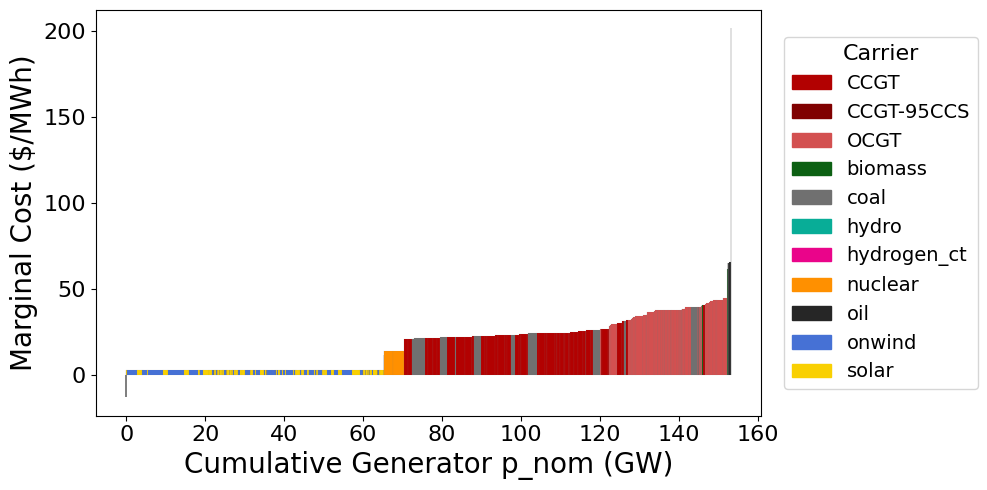

In [24]:
# Get generator data
gen_df = network.generators.copy()

# Sort by marginal_cost
gen_df_sorted = gen_df.sort_values("marginal_cost")

# For a bar plot where the width is p_nom, we need to use plt.bar with x and width arguments
# We'll use the cumulative sum of p_nom to set the left edge of each bar
p_nom = gen_df_sorted["p_nom"].values / 1000
marginal_cost = gen_df_sorted["marginal_cost"].replace(0, 3).values

# Calculate left positions for each bar
lefts = np.concatenate([[0], np.cumsum(p_nom)[:-1]])

# Get carrier colors for each generator
carrier_names = gen_df_sorted["carrier"].values
carrier_colors = network.carriers["color"].reindex(carrier_names).values

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(
    x=lefts,
    height=marginal_cost,
    width=p_nom,
    align='edge',
    edgecolor='grey',  # Remove border lines
    linewidth=0.05,
    color=carrier_colors
)

ax.set_xlabel("Cumulative Generator p_nom (GW)", fontsize=20)
ax.set_ylabel("Marginal Cost ($/MWh)", fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Add a legend mapping carrier colors to carrier names, positioned to the right of the plot
unique_carriers, idx = np.unique(carrier_names, return_index=True)
unique_colors = carrier_colors[idx]
handles = [mpatches.Patch(color=color, label=carrier) for carrier, color in zip(unique_carriers, unique_colors)]

ax.legend(handles=handles, title="Carrier", fontsize=14, title_fontsize=16, loc="center left", bbox_to_anchor=(1.02, 0.5))

plt.tight_layout()
plt.show()

## Lets run the economic dispatch simulation

PyPSA's optimization function `pypsa.network.optimize()` builds the optimization model, either a simulation or production cost model depending on the extendable settings of each component.

We need to ensure all components are set to non-extendable before solving the network.

In [25]:
# You can use this to create an interactive list of components
network.components.keys()

dict_keys(['sub_networks', 'buses', 'carriers', 'global_constraints', 'lines', 'line_types', 'transformers', 'transformer_types', 'links', 'loads', 'generators', 'storage_units', 'stores', 'shunt_impedances', 'shapes'])

In [26]:
# Set all extendable attributes to False for all components in the network
for component in network.components.keys():
    for attr in ["p_nom_extendable", "s_nom_extendable", "e_nom_extendable"]:
        if attr in network.df(component).columns:
            network.df(component)[attr] = False

Remember our load is for 2030, so lets reduce the system load for the sake of this simulation feasibility

In [27]:
network.loads_t.p_set *= 0.75

In [28]:
network.snapshots[0:1]

MultiIndex([(2030, '2030-01-01 00:00:00')],
           names=['period', 'timestep'])

In [29]:
network.optimize.create_model(
    snapshots=network.snapshots[0:1],
    multi_investment_periods=True,
)

Linopy LP model

Variables:
----------
 * Generator-p (snapshot, period, timestep, Generator)
 * Link-p (snapshot, period, timestep, Link)
 * StorageUnit-p_dispatch (snapshot, period, timestep, StorageUnit)
 * StorageUnit-p_store (snapshot, period, timestep, StorageUnit)
 * StorageUnit-state_of_charge (snapshot, period, timestep, StorageUnit)

Constraints:
------------
 * Generator-fix-p-lower (snapshot, period, timestep, Generator-fix)
 * Generator-fix-p-upper (snapshot, period, timestep, Generator-fix)
 * Generator-fix-p-ramp_limit_up (snapshot, period, timestep, Generator-fix)
 * Generator-fix-p-ramp_limit_down (snapshot, period, timestep, Generator-fix)
 * Link-fix-p-lower (snapshot, period, timestep, Link-fix)
 * Link-fix-p-upper (snapshot, period, timestep, Link-fix)
 * StorageUnit-fix-p_dispatch-lower (snapshot, period, timestep, StorageUnit-fix)
 * StorageUnit-fix-p_dispatch-upper (snapshot, period, timestep, StorageUnit-fix)
 * StorageUnit-fix-p_store-lower (snapshot, period, 

In [30]:
network.optimize.solve_model()


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1401 primals, 2823 duals
Objective: 3.80e+05
Solver model: available
Solver message: Optimal



Running HiGHS 1.11.0 (git hash: 364c83a): Copyright (c) 2025 HiGHS under MIT licence terms
LP   linopy-problem-b3ox185x has 2823 rows; 1401 cols; 4246 nonzeros
Coefficient ranges:
  Matrix [9e-01, 1e+00]
  Cost   [1e+01, 2e+02]
  Bound  [0e+00, 0e+00]
  RHS    [1e-01, 1e+04]
Presolving model
7 rows, 345 cols, 367 nonzeros  0s
7 rows, 143 cols, 165 nonzeros  0s
Dependent equations search running on 7 equations with time limit of 1000.00s
Dependent equations search removed 0 rows and 0 nonzeros in 0.00s (limit = 1000.00s)
7 rows, 143 cols, 165 nonzeros  0s
Presolve : Reductions: rows 7(-2816); columns 143(-1258); elements 165(-4081)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -5.6116836589e-02 Pr: 7(37430.6) 0s
         13     3.8048508529e+05 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model name          : linopy-problem-b3ox185x
Model status        : Optimal
Simplex  

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Link-fix-p-lower, Link-fix-p-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

In [31]:
network.optimize.assign_solution()

In [32]:
# The above sequence of commands is equivalent to:
network.optimize(
    snapshots=network.snapshots[0:1]
)

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1419 primals, 2859 duals
Objective: 3.80e+05
Solver model: available
Solver message: Optimal



Running HiGHS 1.11.0 (git hash: 364c83a): Copyright (c) 2025 HiGHS under MIT licence terms
LP   linopy-problem-u_tkydnw has 2859 rows; 1419 cols; 4300 nonzeros
Coefficient ranges:
  Matrix [9e-01, 1e+00]
  Cost   [1e+01, 2e+02]
  Bound  [0e+00, 0e+00]
  RHS    [1e-01, 1e+04]
Presolving model
7 rows, 363 cols, 385 nonzeros  0s
7 rows, 157 cols, 179 nonzeros  0s
Dependent equations search running on 7 equations with time limit of 1000.00s
Dependent equations search removed 0 rows and 0 nonzeros in 0.00s (limit = 1000.00s)
7 rows, 157 cols, 179 nonzeros  0s
Presolve : Reductions: rows 7(-2852); columns 157(-1262); elements 179(-4121)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -6.2881449495e-02 Pr: 7(37430.6) 0s
         15     3.8048508529e+05 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model name          : linopy-problem-u_tkydnw
Model status        : Optimal
Simplex  

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Link-fix-p-lower, Link-fix-p-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

<Axes: xlabel='carrier'>

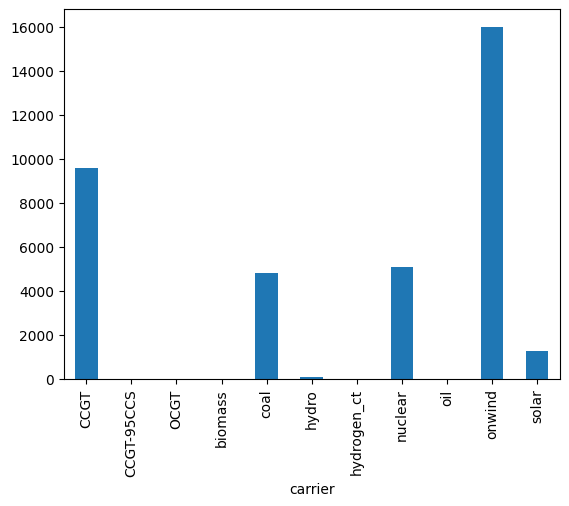

In [33]:
# lets look at the results
network.generators_t.p.loc[network.snapshots[0]].groupby(network.generators.carrier).sum().plot(kind="bar")
# only the first time step is solved!

Now lets solve a week!

In [34]:
network.optimize(
    snapshots=network.snapshots[0:7*24],
)

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 5/5 [00:00<00:00, 11.39it/s]
INFO:linopy.io: Writing time: 3.75s


Running HiGHS 1.11.0 (git hash: 364c83a): Copyright (c) 2025 HiGHS under MIT licence terms
LP   linopy-problem-h5j4268_ has 626270 rows; 238392 cols; 1017837 nonzeros
Coefficient ranges:
  Matrix [9e-01, 1e+00]
  Cost   [1e+01, 2e+02]
  Bound  [0e+00, 0e+00]
  RHS    [5e-02, 2e+04]
Presolving model
3020 rows, 62093 cols, 70653 nonzeros  0s
2686 rows, 29805 cols, 37697 nonzeros  0s
Dependent equations search running on 2352 equations with time limit of 1000.00s
Dependent equations search removed 0 rows and 0 nonzeros in 0.00s (limit = 1000.00s)
2686 rows, 29805 cols, 37697 nonzeros  0s
Presolve : Reductions: rows 2686(-623584); columns 29805(-208587); elements 37697(-980140)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 1176(5.06216e+06) 1s
       5021     4.2245412861e+07 Pr: 0(0); Du: 0(2.66454e-14) 1s
       5021     4.2245412861e+07 Pr: 0(0); Du: 0(2.66454e-14) 1s
Solving

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 238392 primals, 626270 duals
Objective: 4.22e+07
Solver model: available
Solver message: Optimal



Writing the solution to /private/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/linopy-solve-hjkumggj.sol


INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Link-fix-p-lower, Link-fix-p-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

<Axes: xlabel='period,timestep'>

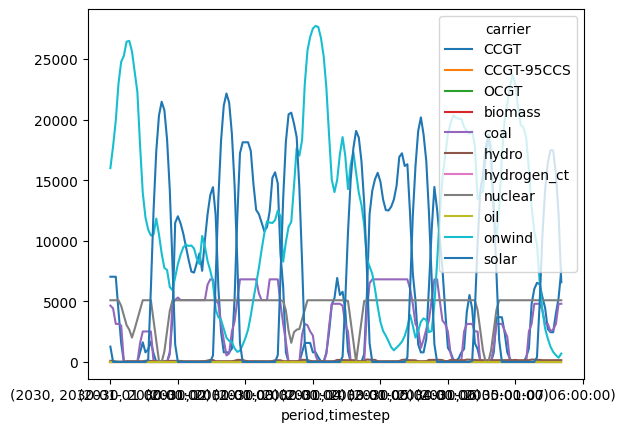

In [35]:
network.generators_t.p.loc[network.snapshots[0:7*24]].T.groupby(network.generators.carrier).sum().T.plot(kind="line")

But this only includes generators! we have storage units in out model and potentially stores, links, etc in other models!

In [36]:
network.carriers.loc['AC_exp', 'color'] = "#000000"

/Users/kamrantehranchi/Local_Documents/energy310_notebooks/.venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1800: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



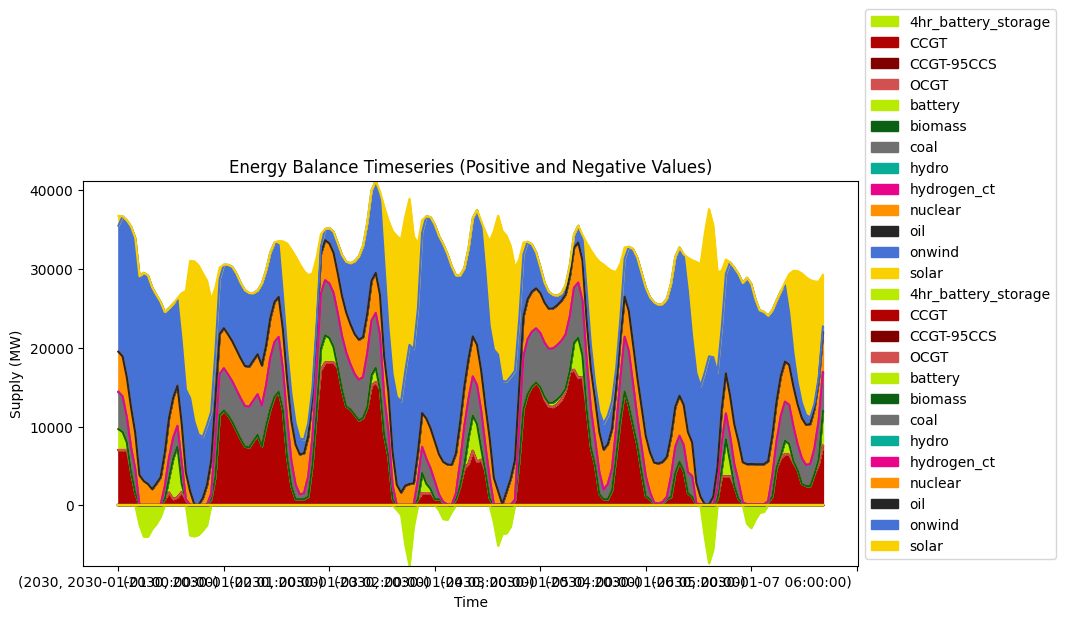

In [37]:
# Prepare the data
energy_balance = (
    network.statistics.energy_balance(comps=["Generator","StorageUnit"], aggregate_time=False, nice_names=False)
    .loc[:, :]
    .droplevel(0)
    .iloc[:, :7*24]
    .groupby("carrier")
    .sum()
    .where(lambda x: np.abs(x) > 0)
    .fillna(0)
    .T
)

# Separate positive and negative values
energy_pos = energy_balance.clip(lower=0)
energy_neg = energy_balance.clip(upper=0)

# Get color mapping for carriers
carrier_colors = network.carriers.color.reindex(energy_balance.columns)
color_dict = carrier_colors.to_dict()

# Plot both positive and negative values on the same plot, using carrier colors
fig, ax = plt.subplots(figsize=(10, 5))
energy_pos.plot.area(
    ax=ax, 
    stacked=True,
    legend=False,
    color=[color_dict.get(c, None) for c in energy_pos.columns]
)
energy_neg.plot.area(
    ax=ax, 
    stacked=True,
    legend=False,
    color=[color_dict.get(c, None) for c in energy_neg.columns]
)

# Fix y-limits to show the full range of data
ymin = energy_neg.sum(axis=1).min()
ymax = energy_pos.sum(axis=1).max()
ax.set_ylim(ymin, ymax)

ax.set_title("Energy Balance Timeseries (Positive and Negative Values)")
ax.set_ylabel("Supply (MW)")
ax.set_xlabel("Time")
# Combine legends from both plots
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
plt.show()

In [38]:
network.statistics()

Optimal Capacity Installed Capacity  \
                                                    2030               2030   
Generator   Biomass                              137.000            137.000   
            Ccgt-95Ccs                               NaN                NaN   
            Coal                               14329.700          14329.700   
            Combined-Cycle Gas                 41404.100          41404.100   
            Hydrogen Combustion Turbine              NaN                NaN   
            Nuclear                             5138.600           5138.600   
            Oil                                  799.800            799.800   
            Onshore Wind                       34363.600          34363.600   
            Open-Cycle Gas                     17071.700          17071.700   
            Reservoir & Dam                      555.100            555.100   
            Solar                              30326.000          30326.000   
Link        Ac                                 99247.628          99247.628   
Load        Ac                                     0.000              0.000   
StorageUnit 4Hr_Battery_Storage                      NaN                NaN   
            Battery Storage                    10332.200          10332.200   

                                               Supply    Withdrawal  \
                                                 2030          2030   
Generator   Biomass                               NaN           NaN   
            Ccgt-95Ccs                            NaN           NaN   
            Coal                         5.425517e+05           NaN   
            Combined-Cycle Gas           9.279408e+05           NaN   
            Hydrogen Combustion Turbine           NaN           NaN   
            Nuclear                      7.611423e+05           NaN   
            Oil                                   NaN           NaN   
            Onshore Wind                 1.973695e+06           NaN   
            Open-Cycle Gas                        NaN           NaN   
            Reservoir & Dam              1.763561e+04           NaN   
            Solar                        9.209533e+05           NaN   
Link        Ac                                    NaN  2.933294e+06   
Load        Ac                                    NaN  5.062156e+06   
StorageUnit 4Hr_Battery_Storage                   NaN           NaN   
            Battery Storage              8.483948e+04  9.981116e+04   

                                        Energy Balance  Transmission  \
                                                  2030          2030   
Generator   Biomass                                NaN  0.000000e+00   
            Ccgt-95Ccs                             NaN  0.000000e+00   
            Coal                          5.425517e+05  0.000000e+00   
            Combined-Cycle Gas            9.279408e+05  0.000000e+00   
            Hydrogen Combustion Turbine            NaN  0.000000e+00   
            Nuclear                       7.611423e+05  0.000000e+00   
            Oil                                    NaN  0.000000e+00   
            Onshore Wind                  1.973695e+06  0.000000e+00   
            Open-Cycle Gas                         NaN  0.000000e+00   
            Reservoir & Dam               1.763561e+04  0.000000e+00   
            Solar                         9.209533e+05  0.000000e+00   
Link        Ac                           -2.933294e+06  2.933294e+06   
Load        Ac                           -5.062156e+06  0.000000e+00   
StorageUnit 4Hr_Battery_Storage                    NaN  0.000000e+00   
            Battery Storage              -1.497167e+04  0.000000e+00   

                                        Capacity Factor   Curtailment  \
                                                   2030          2030   
Generator   Biomass                                 NaN  1.077287e+06   
            Ccgt-95Ccs                      

In [42]:
network.buses_t.marginal_price

p60        p62        p61        p63  \
period timestep                                                          
2030   2030-01-01 00:00:00  21.222429  21.324385  21.495987  21.835932   
       2030-01-01 01:00:00  21.222429  21.324385  21.495987  21.835932   
       2030-01-01 02:00:00  21.218977  21.320916  21.492490  21.832379   
       2030-01-01 03:00:00  20.630356  20.729467  20.896282  21.226742   
       2030-01-01 04:00:00  19.576206  19.453287  19.609832  20.422143   
...                               ...        ...        ...        ...   
       2030-12-31 19:00:00   0.000000   0.000000   0.000000   0.000000   
       2030-12-31 20:00:00   0.000000   0.000000   0.000000   0.000000   
       2030-12-31 21:00:00   0.000000   0.000000   0.000000   0.000000   
       2030-12-31 22:00:00   0.000000   0.000000   0.000000   0.000000   
       2030-12-31 23:00:00   0.000000   0.000000   0.000000   0.000000   

                                  p64        p65        p67  
period timestep                                              
2030   2030-01-01 00:00:00  22.303747  22.203848  22.652712  
       2030-01-01 01:00:00  22.303747  22.203848  22.652712  
       2030-01-01 02:00:00  22.303747  22.203848  22.652712  
       2030-01-01 03:00:00  21.685034  21.587907  22.024318  
       2030-01-01 04:00:00  20.863063  21.035300  21.460541  
...                               ...        ...        ...  
       2030-12-31 19:00:00   0.000000   0.000000   0.000000  
       2030-12-31 20:00:00   0.000000   0.000000   0.000000  
       2030-12-31 21:00:00   0.000000   0.000000   0.000000  
       2030-12-31 22:00:00   0.000000   0.000000   0.000000  
       2030-12-31 23:00:00   0.000000   0.000000   0.000000  

[8760 rows x 7 columns]

### But that wasn't a single node network!

In [39]:
busmap = network.buses.interconnect
# network.buses.drop(columns='Pd', inplace = True)
network.cluster.cluster_by_busmap(busmap)

ValueError: In Bus cluster Pd, the values of attribute Pd do not agree:
Bus
p60      519.00
p61     1004.67
p62      976.26
p63    21406.78
p64     5129.76
p65     9255.81
p67    12928.83
Name: Pd, dtype: float64